<h1 align="center">**Feature Engineering**</h1>

![Data_Cleaning](../images/feature_engineering.jpg)

## Program so far

***

- Basics of Python
- Descriptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization

## Table of contents
***
- Scaling, Centering, Skewness 
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering

Until now all the data that we have seen so far has been clean or pre-cleaned.
In real-life we rarely get such clean datasets. 

## John's Concerns
***
After dealing with outliers, John realised the significance of a clean data set. So he decided to learn more about data cleaning and data manipulation.

He used the data he had collected so far.

Let's see how John proceeds!

In [9]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer

John considered some of the initial entries and realised the data :-
- Had missing values
- Had outliers
- Was sub-optimally represented 


In [3]:
# Let's import the set
df = pd.read_csv('../data/train.csv',index_col=0)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Treatment of Data
***
John had already applied linear regression on the house pricing dataset.And it didn't seem to be very helpful.

He knows that he cannot apply a ML model on this raw data currently.

Stuck with this, he consults his friend Jane for help. Jane suggested him to treat the data and creating new relevant features using the following techniques:
- Data Cleaning and Pre-processing
- Feature Extraction
- Feature Engineering

Let’s see how these techniques helped John:


## Data Cleaning and Pre-processing
***
Data cleaning and preprocessing involves following techniques
- Handling outliers
- Handling missing values
- Handling skewness

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
### Handling Outilers
***

**Why Outlier Treatment?**
***
Jane asked John to starts plotting few graphs of numerical features in order to study their behaviour

Let's see how John plots *GrLivArea vs SalePrice*.  

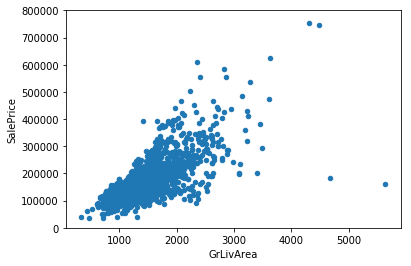

In [3]:
#Scatter plot GrLivArea vs SalePrice
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

## So what did John observe?
***
* The _SalePrice_ and _GrLivArea_ are in a linear relationship.

* At the bottom right there are two points with extremely large GrLivArea that are of a low price. These values are huge oultliers.

He decides, to plot a few more graphs.

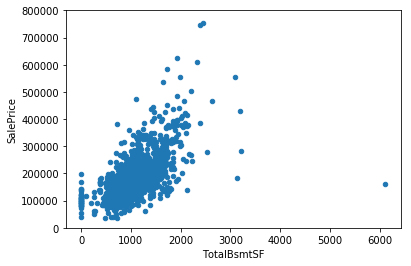

In [4]:
#Scatter plot TotalBsmtSF vs SalePrice

data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

It seems that **'TotalBsmtSF'** is also linearly dependent on **'SalePrice'**.

At the bottom right of the plot John can noticed that, there is one outlier which is having a high Basement area at relatively quite cheap Sale Price.

There are quite a few outliers in the data. John considered this to be one of the reasons the Linear Regression model performed poorly.

John was through with analyzing the numerical features in the data.

Intuitively, John started thinking about the change in behaviour for the categorical features.

He decided to go with his intuition and began analysing the categorical features.

Wondering how to start, Jane suggested to use boxplots.

John plotted a boxplot for the OverallQual and SalePrice to analyze them.

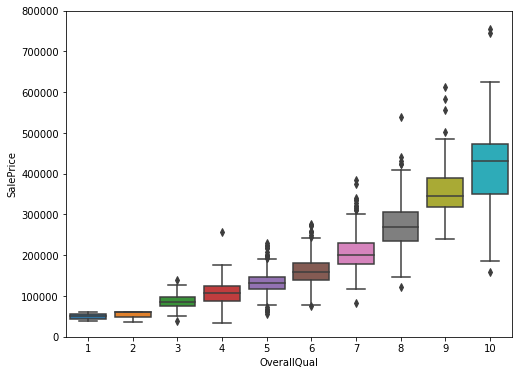

In [5]:
# Box plot of OverallQual vs SalePrice

data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- Treating outliers is important because
Outliers can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.
Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data.

- Surely John knows this, let's see how he removes them

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## John's Approach 1: Univariate Methods
***
John selects a threshold value for the Numerical features and removes all the rows beyond that threshold value.

In short :
- Visualize the data using scatterplots, histograms and box and whisker plots and look for extreme values.
- Assume a distribution (Gaussian) and look for values 1.5 times from the first or third quartile
- Filter out outliers candidate from training dataset and assess the model’s performance.

Let's see how John treat the ouliers:-

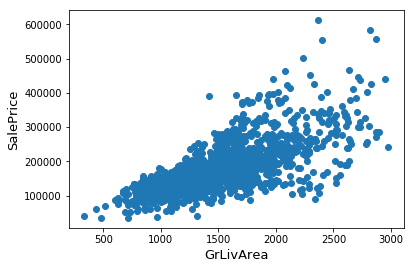

In [6]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>3000) & (df['GrLivArea']<6000)].index)

#Check the graph again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## What changed?
***
Let's draw the original plot and the plot after removing the outliers.


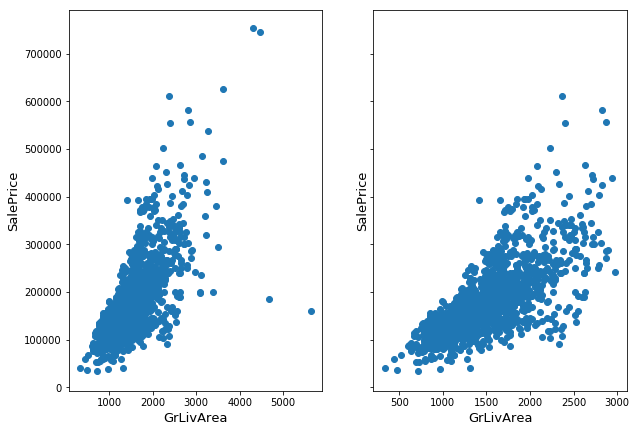

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 7))

data = pd.read_csv('../data/train.csv',index_col=0)
ax1.scatter(data['GrLivArea'], data['SalePrice']);
ax1.set_ylabel('SalePrice', fontsize=13)
ax1.set_xlabel('GrLivArea', fontsize=13)


ax2.scatter(df['GrLivArea'], df['SalePrice'])
ax2.set_ylabel('SalePrice', fontsize=13)
ax2.set_xlabel('GrLivArea', fontsize=13)

plt.show()

John had a requirement of a house with living area round 3000sq. The houses with greater Ground Living Area were outliers for him.

As, we can easily note from the above plots, that the outliers have been removed.

John had heard of few other approaches, that he could have tried to remove the outliers. They are : 


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

#### Approach 2: Multivariate Methods

- Use clustering methods to identify the natural clusters in the data, identify the points which far away from the cluster centroids
- Use dimensionality reduction techniques

**Note: ** We will study about these techniques in _Unsupervised Learning_.


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

#### Approach 3: Algorithmic Methods

- Ensemble methods like random forests and gradient boosting provide relatively robust results with data with outliers.

**Note:** We will study about these techniques in _Unsupervised Learning_.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Handling Missing Values
***

John was happy that the outliers had been removed. 

He was casually skimming through the data when he realised that a lot of the data had missing values.

Intuitively, he decided to check out few entries in the data, which had most values as null.

For each house entry, he observed the number of features which were missing and arrange them in an ascending order.

In [8]:
# missing data
total = df.isnull().sum(axis=1).sort_values(ascending=False)
percent = (df.isnull().sum(axis=1)/df.isnull().count(axis=1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,,
534,15,0.1875
1219,15,0.1875
1012,15,0.1875
40,15,0.1875
521,14,0.1750
1180,14,0.1750
706,14,0.1750
343,11,0.1375
1031,11,0.1375


The house entry number 40 had values of 15 features missing. So, did the houses number 1219, 1012, 534 and so on.
John realised that there were too many of them

Worried, John consulted Jane again on this. Jane explained a few methods to treat missing values.

Data can have missing values. It's very normal to have some missing values.

**Reasons for Missing Values**

- These are values for attributes where a measurement could not be taken or is corrupt for some reason.
- Missing that depends on unobserved predictors

**Why Missing Value Treatment?**
- Missing data in the training data set can reduce the power / fit of a model.
- Missing values can lead to a biased model because we have not analyzed the behavior and relationship with other variables correctly
- This is useful because some algorithms are unable to work with or exploit missing data.

Therefore, it is important to identify and mark this missing data. Once marked, replacement values can be prepared.

In [9]:
missing_data.Total.nonzero()

(array([   0,    1,    2, ..., 1439, 1440, 1441]),)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## John's Approach 1: Remove records (rows) that contain a missing value
***
John had so many houses with missing features.
He wondered, what would he do?

He found it easy to remove all those rows which contained null values.
Neat and Simple, he thought.

So, let's drop all those houses which had any feature as 0.
If all the features, for a house were available, only then it would be retained. 

In [10]:
df_copy = df.copy().dropna(how='any')
df_copy.shape

(0, 80)

Unfortunately, none of the observations had values for all the features i.e. non-empty rows
John would surely lose out all his data in such this case.

Hence he could not remove houses (rows) that contain missing value as it will lead to loss of significant information because the missing value is spread all over dataset. 

In a nutshell :
- This approach would work fine if the amount of missing values is very small (up to ~2% of entire data)

- But with large amount of scattered missing values, we would lose out on some valuable information.


**Note:**

A slightly better approach would be to drop only those rows, which had all the values as null.
This would surely work better then the previous approach, thought Jon.

Let's check the number of houses, with at least some data. 

In [11]:
df_copy = df.copy().dropna(how='all')
df.shape

(1442, 80)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Jon's Approach 2: Remove features (columns) that contain missing values.
***
John thought of now exploring the features rather than the individual houses.

For each feature(column) in the data, John counted the number of houses(rows) with null values.

In [12]:
#missing data observing in columns
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PoolQC,1438,99.722607
MiscFeature,1388,96.255201
Alley,1352,93.758669
Fence,1166,80.859917
FireplaceQu,689,47.780860
LotFrontage,257,17.822469
GarageType,79,5.478502
GarageCond,79,5.478502
GarageFinish,79,5.478502
GarageQual,79,5.478502


Jon observed from the above information that features such as **PoolQC, MiscFeature, Alley, Fence** are having most of the values labeled as missing. Hence, they don't seem to be very important and will not have a significant effect.

We can surely drop those columns.
So, let's drop these columns with high missing values & check the remaining columns. 

In [13]:
# droping columns containing high missing values 
df1=df.copy()
df1.drop(["PoolQC", "MiscFeature","Alley","Fence"], axis = 1, inplace = True)
# display the columns left after droping the above features
list(df1.columns.values)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Jon's Approach 3: Missing values Imputation
***
None of the above techniques worked for John. He dropped a few columns, however he observed that there still were other features with high number of missing values.

The *FireplaceQu* column has around 700 missing values whereas *LotFrontage* has around 300 missing values.
He was in a dilemma, whether to retain them or drop them.

After a long time, he decided to retain them. But, what should he do with the missing values?

Let's check out a few columns from the data.

In [14]:
print(df[["PoolQC","MiscFeature","GarageYrBlt","GarageArea","GarageCars"]])

     PoolQC MiscFeature  GarageYrBlt  GarageArea  GarageCars
Id                                                          
1       NaN         NaN       2003.0         548           2
2       NaN         NaN       1976.0         460           2
3       NaN         NaN       2001.0         608           2
4       NaN         NaN       1998.0         642           3
5       NaN         NaN       2000.0         836           3
6       NaN        Shed       1993.0         480           2
7       NaN         NaN       2004.0         636           2
8       NaN        Shed       1973.0         484           2
9       NaN         NaN       1931.0         468           2
10      NaN         NaN       1939.0         205           1
11      NaN         NaN       1965.0         384           1
12      NaN         NaN       2005.0         736           3
13      NaN         NaN       1962.0         352           1
14      NaN         NaN       2006.0         840           3
15      NaN         NaN 

What he did was that he imputed the missing values with a representative constant value that has meaning within the domain, such as 0 or None, distinct from all other values.

He imputed them by proceeding sequentially through features with missing values.

- PoolQC : data description says NA means "No Pool". That makes sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

- MiscFeature : data description says NA means "no misc feature"
- GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

John consider 'NA',  'no misc features' and 'Nan' to be equivalent to null values and need to be imputed.

Let's impute the missing values as per the following :
- Categorical Features : None
- Numerical Features : 0

In [15]:
df2=df.copy()
df2["PoolQC"] = df2["PoolQC"].fillna("None")
df2["MiscFeature"] = df2["MiscFeature"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df2[col] = df2[col].fillna(0)
print(df2[["PoolQC","MiscFeature","GarageYrBlt","GarageArea","GarageCars"]])

     PoolQC MiscFeature  GarageYrBlt  GarageArea  GarageCars
Id                                                          
1      None        None       2003.0         548           2
2      None        None       1976.0         460           2
3      None        None       2001.0         608           2
4      None        None       1998.0         642           3
5      None        None       2000.0         836           3
6      None        Shed       1993.0         480           2
7      None        None       2004.0         636           2
8      None        Shed       1973.0         484           2
9      None        None       1931.0         468           2
10     None        None       1939.0         205           1
11     None        None       1965.0         384           1
12     None        None       2005.0         736           3
13     None        None       1962.0         352           1
14     None        None       2006.0         840           3
15     None        None 

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Jon's approach 5: Impute missing values with a mean, median or mode value for the column.
***
Imputing values with a default value, is a good option.
But, we can still perform better, right?

John, thought of imputing the missing values with more relevant data rather than a default value.
Indeed, a great idea!!

John applied this idea on a few features in our data.

_Numerical Feature :_ 
- Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , he filled in missing values by the median LotFrontage of the neighborhood.


_Categorical Feature :_
- However, for categorical feature one cannot calculate **mean** or **median**.
- 'RL' is by far the most common value. So he filled in missing values with 'RL'.

In [16]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(df2[['LotFrontage']])
df2['LotFrontage'] = imp_mean.transform(df[['LotFrontage']]).ravel()
print(df2["LotFrontage"])

#Mode value imputation
df2['MSZoning'] = df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])
print(df2['MSZoning'])

Id
1        65.000000
2        80.000000
3        68.000000
4        60.000000
5        84.000000
6        85.000000
7        75.000000
8        69.433755
9        51.000000
10       50.000000
11       70.000000
12       85.000000
13       69.433755
14       91.000000
15       69.433755
16       51.000000
17       69.433755
18       72.000000
19       66.000000
20       70.000000
21      101.000000
22       57.000000
23       75.000000
24       44.000000
25       69.433755
26      110.000000
27       60.000000
28       98.000000
29       47.000000
30       60.000000
           ...    
1431     60.000000
1432     69.433755
1433     60.000000
1434     93.000000
1435     80.000000
1436     80.000000
1437     60.000000
1438     96.000000
1439     90.000000
1440     80.000000
1441     79.000000
1442     69.433755
1443     85.000000
1444     69.433755
1445     63.000000
1446     70.000000
1447     69.433755
1448     80.000000
1449     70.000000
1450     21.000000
1451     60.000000
1452     

**Other Methods to Handle Missing Values : **

#### Approach 6: Impute missing values with a value estimated by another predictive model

We will study these techniques while we learn _Unsupervised Learning_

#### Approach 7 : Use algorithms that Support Missing Values

Not all algorithms fail when there is missing data.

There are certain algorithms that work well even with missing values.
For such algorithms, we need not worry about the missing values.

Few such algorithms are : 
- Random Forest
- Classification and Regression Trees
- KNN

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
# Handling Skewness
***

So far John has really made some good progress.

However, John knows that the Linear Regression has following assumptions:
- Linear relationship
- **Multivariate normality**

**Multivariate normality means that regression requires all its variables to be normal. 
By having skewed data one might violate the assumption of normality.**

So, he is far from applying a Linear Regression yet and needs to check the skewness of the data.
Let's explore a bit more about Skewness.

**What is Skewness?**

- Skewness is a measure of asymmetry of distribution.
- Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 

**Why handle Skewness?**
- Many model building techniques have the assumption that predictor values are distributed normally and have a symmetrical shape. Hence, it is sometimes paramount to deal with skewness.
- Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. 

Let's look at some plots.
Here, we check the skewness of `GrLivArea` and plot it. 

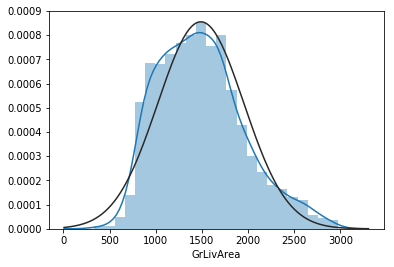

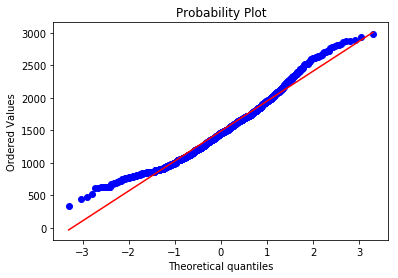

In [17]:
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

Now, lets numerically calculate the skewness for the _GrLivArea_ feature.

In [18]:
skewed_grLiv = skew(df['GrLivArea'])
print(skewed_grLiv)

0.563991440063


For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution.

As evident from the histogram plot, the *GrLivArea* is *Left skewed*.

Hmm... let's try removing skewness from our data.

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## John's Approach 1: Replacing the data with the log, square root, or inverse transformed data may help to remove the skewness.
***

John read that applying **log transformation** on the data would reduce the skewness. It was worth a try, he thought.

Let's see how he applied Log Transform to remove the skewness in the data and plot it.

John chose to focus on the **GrLivArea** feature for which he had already calculated the skewness. 

In [19]:
#data transformation
df_trans=df.copy()
df_trans['GrLivArea'] = np.log(df_trans['GrLivArea'])

Applying log_transform on the _GrLivArea_ and plot them.

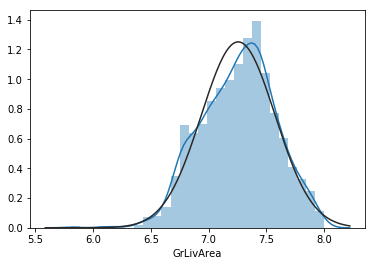

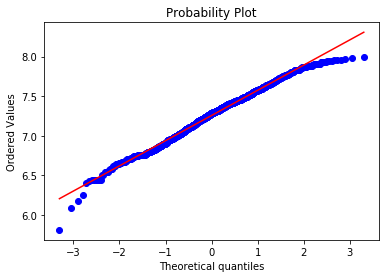

In [20]:
#transformed histogram and normal probability plot
sns.distplot(df_trans['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_trans['GrLivArea'], plot=plt)

John was happy to see that the plot is now much more symettrical. It seems more like a bell curve now.

Let's verify the same numerically.

In [21]:
skewness_grLiv = skew(df_trans['GrLivArea'])
print(skewness_grLiv)

-0.225668612232


Hmm... Log transformation did remove skewness in the original data.
Quite evidently, the skewness value is now much more closer to 0.

When Jane learnt about this she informed John about another method **"Square Root Transformation"** to remove skewness in the data.

Let's see how to apply Square Root transformation

/home/aditya/.local/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


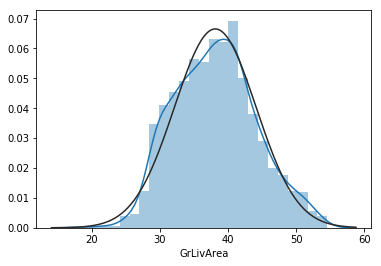

In [22]:
df_trans = df.copy()
df_trans['GrLivArea'] = np.sqrt(df_trans['GrLivArea'])

sns.distplot(df_trans['GrLivArea'], fit=norm)
fig = plt.figure()
fig.show()

Similar to the log transform; even the square root transformation seems to reduce the skewness.

Let's verify the same numerically.

In [23]:
skewness_grLiv = skew(df_trans['GrLivArea'])
print(skewness_grLiv)

0.183965789564


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Feature Extraction
***

After such an exhausting work, John was finally ready to apply the Linear Regression on the dataset.

## But ....
***
Linear Regression assumes that all the data, is normally distributed

"What should I do? How can I make the data have a normal distribution?" 

Finding himself again in a problem, John called up Jane.

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

### Standardization
***
- Standardization is recommended when regression models are being built.
- Standardization of data is to have zero mean and unit variance.


Standardization cannot be performed on Categorical data, so we need to separate Numerical Features and Categorical Features.

So, Jane asked John to separate the original data into two categories : Numerical and Categorical

In [33]:
numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int64','float64']]
numeric_data = df.iloc[:,numeric_feature]

cat_name = df.columns.difference(df.columns[numeric_feature])
cat_data = df.loc[:,cat_name]

Let's check out some of the entries in Numerical Data & Categorical Data

In [34]:
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
cat_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
4,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
5,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


However, before applying Standardization, it is required that all the data needs to be imputed.

So, let's first impute the missing values and then standardize the data.
Also, after imputing let's check all the columns once.

In [36]:
# Imputing the missing values in numeric data to futher process it for standardization
from sklearn.preprocessing import Imputer

fill_Nan = Imputer(missing_values = np.nan, strategy ='median', axis=1)

imputed_DF = pd.DataFrame(fill_Nan.fit_transform(numeric_data))

imputed_DF.columns = numeric_data.columns
imputed_DF.index = numeric_data.index
imputed_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 1 to 1460
Data columns (total 37 columns):
MSSubClass       1442 non-null float64
LotFrontage      1442 non-null float64
LotArea          1442 non-null float64
OverallQual      1442 non-null float64
OverallCond      1442 non-null float64
YearBuilt        1442 non-null float64
YearRemodAdd     1442 non-null float64
MasVnrArea       1442 non-null float64
BsmtFinSF1       1442 non-null float64
BsmtFinSF2       1442 non-null float64
BsmtUnfSF        1442 non-null float64
TotalBsmtSF      1442 non-null float64
1stFlrSF         1442 non-null float64
2ndFlrSF         1442 non-null float64
LowQualFinSF     1442 non-null float64
GrLivArea        1442 non-null float64
BsmtFullBath     1442 non-null float64
BsmtHalfBath     1442 non-null float64
FullBath         1442 non-null float64
HalfBath         1442 non-null float64
BedroomAbvGr     1442 non-null float64
KitchenAbvGr     1442 non-null float64
TotRmsAbvGrd     1442 non-null floa

Let's check out some of the entries of the Imputed DataFrame and check if any of the features contain any null value.

In [37]:
imputed_DF.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [38]:
imputed_DF.isnull().values.any()

False

Also, let's check out some of the columns in the data

In [41]:
column_transform = numeric_data.columns
column_transform

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

Now, that the missing values have been imputed, Jane asked John to move on to standardizing the data using scale() function in preprocessing module of sklearn library.

Also, check out the standardized data.

In [39]:
from sklearn import preprocessing
standardized_DF = preprocessing.scale(imputed_DF)
standardized_DF

array([[ 0.07625473,  0.21367492, -0.19454079, ..., -1.60431719,
         0.13789927,  0.40961178],
       [-0.86760206,  0.681207  , -0.0771501 , ..., -0.49422823,
        -0.61532325,  0.0430575 ],
       [ 0.07625473,  0.30718133,  0.09128002, ...,  0.98589038,
         0.13789927,  0.61325304],
       ..., 
       [ 0.31221892,  0.24484372, -0.1341101 , ..., -0.49422823,
         1.6443443 ,  1.19702466],
       [-0.86760206,  0.30718133, -0.06520687, ..., -0.86425788,
         1.6443443 , -0.49150081],
       [-0.86760206,  0.52536297, -0.04274952, ..., -0.12419858,
         0.13789927, -0.41852936]])

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Scaling
***
After observing the data, John realised that it wasn't a great idea to compare two entirely different things.

For eg : It wouldn't be wise to compare GrLivArea(squarefoot) and YrSold(time) even though both are numerical features.


When there are predictors with different units and ranges, the final model will have coefficients which are very small for some predictors and it makes it difficult to interpret.

He needs to somehow **scale down everything in a range**, so that the model's prediction is not affected by the different units at all.

**Scaling**

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

Centering and Scaling will improve the numerical stability of some models

But Standardization cannot be applied on categorical data, hence we split the categorical and numerical data in order to standardize the numerical data.

In [42]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler
stand_scale= StandardScaler()
imputed_DF.loc[:, column_transform] = stand_scale.fit_transform(imputed_DF.loc[:, column_transform])
imputed_DF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.076255,0.213675,-0.194541,0.682599,-0.518955,1.054794,0.882718,0.560635,0.632594,-0.288541,...,-0.746410,0.228068,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,-1.604317,0.137899,0.409612
2,-0.867602,0.681207,-0.077150,-0.053057,2.198961,0.154234,-0.421313,-0.580792,1.267655,-0.288541,...,1.650317,-0.706060,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,-0.494228,-0.615323,0.043058
3,0.076255,0.307181,0.091280,0.682599,-0.518955,0.988086,0.834421,0.362633,0.118941,-0.288541,...,-0.746410,-0.062890,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,0.985890,0.137899,0.613253
4,0.312219,0.057831,-0.082254,0.682599,-0.518955,-1.880365,-0.711098,-0.580792,-0.511451,-0.288541,...,-0.746410,-0.170085,4.214305,-0.117073,-0.270177,-0.052286,-0.088238,-1.604317,-1.368546,-0.520350
5,0.076255,0.805882,0.398537,1.418255,-0.518955,0.954732,0.737826,1.457471,0.513520,-0.288541,...,0.797790,0.580281,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,2.095979,0.137899,0.973019
6,-0.159709,0.837051,0.383736,-0.788713,-0.518955,0.721253,0.496338,-0.580792,0.693298,-0.288541,...,-0.424702,-0.246653,-0.364331,10.735113,-0.270177,-0.052286,1.314526,1.355920,0.891122,-0.479622
7,-0.867602,0.525363,-0.027744,1.418255,-0.518955,1.088148,0.979313,0.502399,2.180556,-0.288541,...,1.304480,0.166814,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,0.615861,-0.615323,1.746856
8,0.076255,2.301985,0.002676,0.682599,0.387017,0.054171,-0.566206,0.816874,0.989816,-0.090730,...,1.143626,2.417910,3.473643,-0.117073,-0.270177,-0.052286,0.613144,1.725950,0.891122,0.294215
9,-0.159709,-0.222688,-0.432385,0.682599,-0.518955,-1.346700,-1.677047,-0.580792,-1.015764,-0.288541,...,-0.022566,-0.706060,3.086479,-0.117073,-0.270177,-0.052286,-0.088238,-0.864258,0.137899,-0.657468


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
### Algebraic Transformations
***

John is now thorough with Polynomial Features and dealing with skewness using log transformation and square root transformation.

All of these, fall under **ALGEBRAIC TRANSFORMATIONS.**

John has already observed that transforming a variable into another form drastically improves a model’s performance.

Let's look at another example.

Here, John plots the distribution plot and probablity plot for TotalBsmtSF. 

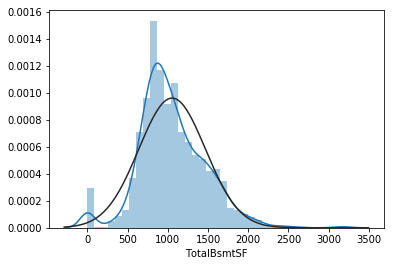

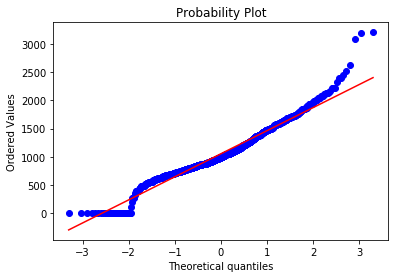

In [31]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

John faced a problem while looking through the observations of variable `TotalBsmtSF`

- A significant number of observations with value zero (houses without basement) as evident by the horizontal section of the blue line.
- A big problem because the value zero doesn't allow us to do log transformations.

Jane to the rescue again!! She suggested to apply a sqrt transformation here, he will have to create a variable that can get the effect of having or not having basement (binary variable). 

John, then, did a log transformation to all the non-zero observations, ignoring those with value zero. This way one can transform data, without losing the effect of having or not basement.

If the house has a basement then we add them to a different column, else ignore it.

In [50]:
#create column for new variable 
#if area>0 it gets 1, for area==0 it gets 0

df['NewBsmt'] = 0
df.loc[df.TotalBsmtSF > 0, "NewBsmt"] = 1
len(df.loc[df['NewBsmt'] == 1])

1421

Now, let's apply square root transform over this new column & then replot the histogram and probability plot for it.

In [51]:
# transform data
df.loc[df.NewBsmt == 1,'TotalBsmtSF'] = np.sqrt(df['TotalBsmtSF'])

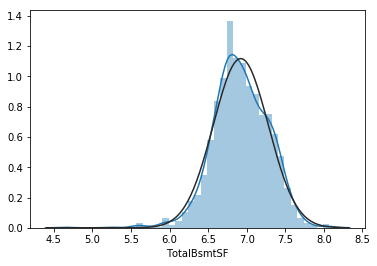

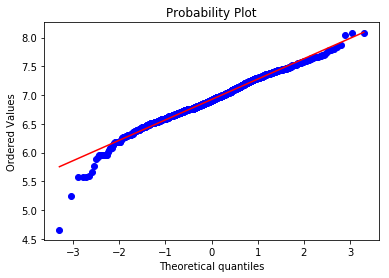

In [154]:
# histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

So, far we have covered log and sqrt tranformations,
Here are a few more useful transforms:

- Exponential Transform
- Tanh Transform
- Polynomial Transform


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
# Feature Engineering
***

John was now observing the data more better then ever. After a few minutes of skimming through the data, he observed that there were few insignificant columns present in the data.

For eg; the following features conveyed the same thing :
- BsmtFullBath
- FullBath
- HalfBath

So, it would be wise to combine all these features together into a single column, just to save some time and space.

Unknowingly, partly what John was doing and now, what he's thinking to do is nothing but **FEATURE ENGINEERING.**

Seems, like few things start becoming obvious with time.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## So, what is feature engineering?
***

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. 

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering. (Andrew Ng)
... some machine learning projects succeed and some fail. 

**What makes the difference?**

Easily the most important factor is the features used. (Pedro Domingos)

Feature Engineering: The art of coming up with new features with more predictive power using

- experience
- domain expertise
- empirical processes

Most important techniques in feature engineering

- Applying Domain Expertise
- Combining Feature
- Encoding of categorical variables
- Time series feature extraction
- NLP feature extraction

### Applying Domain Expertise
***
Domain expertise or domain knowledge is nothing but expertise in a particular field , and when I say field it can mean anything like field of Education, Healthcare, Consumer Goods, Retail and the list is endless. 
A domain expert is someone who is not related to the technology aspect but has indepth knowledge about the particular industry, how is it shaping up, the trends, what are the things that will impact the industry.

For example, if you are called into develop a particular application for a consumer goods company and specifically a Apparel & Footwear company.
The application that you build has to be that compliments the industry and the various facets of it, and you as a technology guy wouldnt know it, this is where a domain expert will come in and explain how that industry works and what would be the best way to have the application built.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
### Combining Feature
***
This is one of the crucial part of feature engineering which involves going through the data set variable and understanding the variable(s) and hence combining one or more features to create and new features. This involves some what on intutive decision making and little bit research about the domain of the data set.

This Step basically is used in order to hike the performance of the model which is fitted on the data.

So, let's combine 4 different features `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath` into a single feature `TotalBath`.

Below, we have added all these 4 features in different proportions, to combine them.

In [52]:
# Create new features by combining the existing features

# Overall pool score
df["PoolScore"] = df["PoolArea"] * df["PoolQC"]

# Total number of bathrooms
df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + df["FullBath"] + (0.5 * df["HalfBath"])


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
### Encoding of categorical variables
***
So far John had been focusing much on numerical features. 
He observed that few columns such as ``, `` contain `string` values.

Well, what about it?
It wouldn't matter much, he thought.
But oh boy, was he in for a surprise?

We had learned **Numpy** remember?
Numpy functions work well only with numbers, however when worked with formats other then `int` or `float`, would either give us gibberish result or would give us errors.

So, John now had to convert these categorical features into numbers or vectors or something similar.
How do I do that?

After struggling for a while, he found the solution.
He can do Encoding i.e. encode the string into numbers.

Luckily, sklearn provides us functions to do this work.

Let's Label Encode the `MSZoning` column to numerical features.
Currently this column contains values 'RF', 'RL' and other values. We will change it with numbers\vectors.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## What is Encoding?
***
Most algorithms we use work with numerical values whereas more often than not categorical data are in text/string (male, female) or bin (0-4, 4-8 etc.) form.

One option is to leave these variables out of the algorithms and use only numeric data. But in doing so we can lose out on some critical information.

Hence, it is generally a good idea to include the categorical variables into your algorithms by encoding them to convert to numeric values
But, first let's learn a thing or two about our categorical variables.

Encoding a categorical variable is to categorize them into numerical features.

### Label Encoding
***
Since different kinds of categorical variables capture different amount of information, we need different techniques to encode them.

Label Encoding: Each category is given one label e.g. 0, 1, 2 etc.

Label encoding is a handy technique to encode categorical variables. However, such encoded nominal variables might end up in being misinterpreted as ordinal.

However, nonlinear models like decision trees can handle such encoding

Let's apply Label Encoding on all the categorical features in our dataset. 

In [48]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    

Categorical Dataset

In [49]:
dummyEncode(cat_data)

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,40,41,39,43,39,1,2,2,...,0,5,2,0,0,1,4,8,1,0
2,934,0,40,39,37,43,39,1,1,2,...,947,24,2,962,0,1,4,8,1,0
3,933,0,40,40,39,43,39,1,2,2,...,946,5,2,961,0,1,4,8,1,0
4,932,0,38,41,37,43,40,1,2,2,...,945,6,2,960,0,1,0,8,1,0
5,931,0,40,38,39,43,39,1,2,2,...,944,15,2,959,0,1,4,8,1,0
6,930,0,40,41,39,43,39,1,2,2,...,1390,11,2,958,0,1,4,8,1,0
7,929,0,40,38,39,43,37,1,2,2,...,943,21,2,957,0,1,4,8,1,0
8,928,0,40,40,37,39,39,1,4,2,...,1390,14,2,956,0,1,4,8,1,0
9,927,0,40,41,42,43,40,1,0,2,...,942,17,2,955,0,1,0,8,1,0


In [50]:
cat_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,40,41,39,43,39,1,2,2,...,0,5,2,0,0,1,4,8,1,0
2,934,0,40,39,37,43,39,1,1,2,...,947,24,2,962,0,1,4,8,1,0
3,933,0,40,40,39,43,39,1,2,2,...,946,5,2,961,0,1,4,8,1,0
4,932,0,38,41,37,43,40,1,2,2,...,945,6,2,960,0,1,0,8,1,0
5,931,0,40,38,39,43,39,1,2,2,...,944,15,2,959,0,1,4,8,1,0


Let's try Label Encoding explicitly on the 'MSZoning' column.

In [46]:
from sklearn.preprocessing import LabelEncoder
lablel_encoder = LabelEncoder()
df['MSZoning'] = lablel_encoder.fit_transform(df['MSZoning'])
df['MSZoning']

Id
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       4
10      3
11      3
12      3
13      3
14      3
15      3
16      4
17      3
18      3
19      3
20      3
21      3
22      4
23      3
24      4
25      3
26      3
27      3
28      3
29      3
30      4
       ..
1431    3
1432    3
1433    3
1434    3
1435    3
1436    3
1437    3
1438    3
1439    4
1440    3
1441    3
1442    4
1443    1
1444    3
1445    3
1446    3
1447    3
1448    3
1449    3
1450    4
1451    3
1452    3
1453    4
1454    3
1455    1
1456    3
1457    3
1458    3
1459    3
1460    3
Name: MSZoning, Length: 1442, dtype: int64

As evident, now the column `MSZoning` only contains numerical values, rather then String.

**Encoding can be performed on the following type of variables : **

#### NOMINAL VARIABLES
***
Consider following three categorical variables and their values

**Colour**: Blue, Green, Red, Yellow

**Educational Qualification**: Primary School, Secondary School, Graduate, Post-Graduate, Phd.

**Salary Bracket**: 0-50,000, 50,001-100,000, 100,001-150,000, 150,001-200,000

Although all three of them are categorical variables, they are different in the amount of information they convey. 
Let's look at them one by one.

Colour conveys blue is different from red. That's all. The value of the variable is not meant to capture any relative difference among the values. Such variables are called `Nominal Variables`.

#### ORDINAL VARIABLES
***
Now consider educational qualification.

The value "graduate" does not only conveys that it is different from value say "Primary school", it also implies that it is more in terms of qualification than "Primary School". 

Such variables are called `Ordinal Variables` because they convey a sense of order.

In our example, Primary School < Secondary School < Graduate < Post-Graduate < Phd. (in terms of qualification)

#### INTERVAL VARIABLES
***
The third variable, salary bracket is similar to educational qualification by conveying order (a person earning 50,001-100,000 earns more salary than 0-50,000). 

However, here, apart from knowing the order, we also know the interval between the values. 

Here we can say that the averages of each of the values are separated by 50,000. Such variables are called `Interval variables`.

There are two types of broadly used algorithm which performs the task of encoding of variables.

Let's have a look at these algorithms.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## One hot encoding
***
After studying Label Encoding, John wondered what would happen if the Categories contained more then one string values.
For eg; instead of `RL`, `ML` as values for the `MSZoning`, it contained `RL+AB` and `ML+CD` or something similar?
He wondered, whether he could have been able to apply the Label Encoding then.

Out of curiousity, he started browsing over the internet, and within few clicks of Google Search.
The answer turned out to be **One Hot Encoding**

## What is One Hot Encoding?
***
A dataset with more dimensions requires more parameters for the model to understand, and that means more rows to reliably learn those parameters.

The effect of using One Hot Encoder is addition of a number of columns (dimensions).

If the number of rows in the dataset is fixed, addition of extra dimensions without adding more information for the models to learn from can have a detrimental effect on the eventual model accuracy.
One way to deal with this `curse of dimensionality` is using hashing techniques.

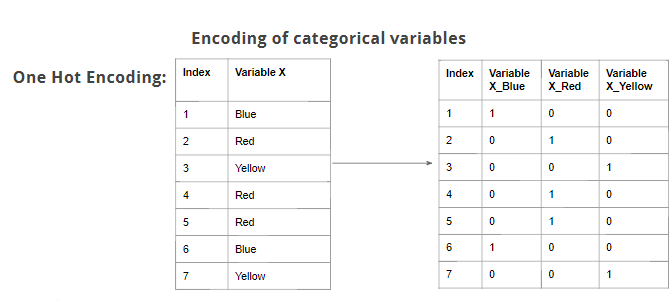

In [263]:
pd.get_dummies(cat_data, drop_first=True) #one hot encoding

,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
### Hashing
***
John was quite satisfied with his work.

But, there is always a **But....**
He thought what would happen, if the dataset contained large number of categorical variables.
Then, the one hot encoding would take up too much of space.

Out of curiosity, he started looking of techniques to optimize this and save some memory.

### Hashing
***
Hashing is a technique where more than one categories of a categorical variable are merged to create one single category. 
There are various techniques on how to merge the categories.

Hashing trick has 3 big advantages to one-hot encoding/ set-of word model:

- It’s much simpler to code.
- It doesn’t require any dictionaries to prepare.
- It’s friendly to online learning where you can train on a dataset that doesn’t fit in memory because you need to see each example only once. One-hot encoding will not work well with online learning because to prepare dictionaries you need to see whole dataset first. 

### Hashing Techniques - Business Logic :
***
Let's say one of the columns in the problem dataset corresponds to "pin codes". There are 182 pincodes in Mumbai. It is impractical to use each pincode as a separate category. 
One way to tackle this situation is to merge the pin codes according to localities, let's say Dadar, Thane etc. 
This can help reduce number of categories and result in meaningful aggregation of pincodes.


### Hashing Techniques - Frequency:
***

It is not possible to apply business logic every time. In such cases we can perform hashing using frequency of occurrence.

### Hashing Techniques - Frequency:

To combine levels using their frequency, we first look at the frequency distribution of of each level and combine levels having frequency say less than 5% of total observation (can be changed based on distribution). This is an effective method to deal with rare levels.
We can also combine levels by considering the response rate of each level. We can simply combine levels having similar response rate into same group.

Let's see in case of our housing data.

In [8]:
dataframe = pd.read_csv('../data/train.csv',index_col=0)
dataframe['MSZoning'].value_counts()/ dataframe['MSZoning'].value_counts().sum()

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Here, we can merge the last three categories to create a larger category. However, we should consider this particular example for demonstration purposes only because,

* Number of categories themselves are not large enough to warrant hashing
* We should make sure that combining categories in such a way does not result in loss of information.

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />
# In-session Recap Time
***
* Data Cleaning & Preprocessing
    - Handling outliers
    - Handling missing values
    - Handling skewness
* Feature Extraction
* Scaling
* Feature Engineering
* Encoding

# Thank You
***

### Next Session: Feature Selection
For more queries - Reach out to academics@greyatom.com 